# Outlier Detection

Dataset with Z-scores and Outlier Labels:
   Temperature   Z_score  Is_Outlier
0    20.993428  0.400925       False
1    19.723471 -0.066876       False
2    21.295377  0.512151       False
3    23.046060  1.157032       False
4    19.531693 -0.137520       False
5    19.531726 -0.137508       False
6    23.158426  1.198423       False
7    21.534869  0.600370       False
8    19.061051 -0.310885       False
9    21.085120  0.434700       False

Outliers Detected:
    Temperature   Z_score
97         30.0  3.718585
98         10.0 -3.648614
99         29.0  3.350225


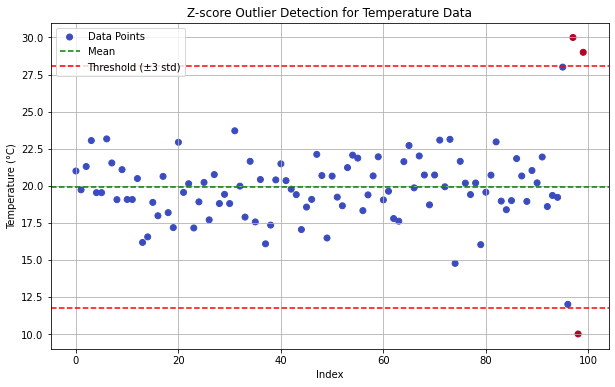

In [1]:
# Using Z-Score 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic univariate dataset (e.g., daily temperatures in Celsius)
# Normal temperatures follow a Gaussian distribution, with a few outliers
n_samples = 100
normal_data = np.random.normal(loc=20, scale=2, size=n_samples - 5)  # Mean=20, std=2
outlier_data = np.array([28, 12, 30, 10, 29])  # Manually added outliers
data = np.concatenate([normal_data, outlier_data])

# Convert to pandas DataFrame for easier handling
df = pd.DataFrame(data, columns=['Temperature'])

# Step 2: Calculate Z-scores
# Z-score = (x - mean) / standard deviation
mean = df['Temperature'].mean()
std = df['Temperature'].std()
df['Z_score'] = (df['Temperature'] - mean) / std

# Step 3: Identify outliers (threshold: |Z-score| > 3)
threshold = 3
df['Is_Outlier'] = df['Z_score'].abs() > threshold

# Step 4: Print results
print("Dataset with Z-scores and Outlier Labels:")
print(df.head(10))
print("\nOutliers Detected:")
print(df[df['Is_Outlier']][['Temperature', 'Z_score']])

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Temperature'], c=df['Is_Outlier'],cmap='coolwarm', label='Data Points')
plt.axhline(y=mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=mean + threshold * std, color='red', linestyle='--',label=f'Threshold (±{threshold} std)')
plt.axhline(y=mean - threshold * std, color='red', linestyle='--')
plt.title('Z-score Outlier Detection for Temperature Data')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

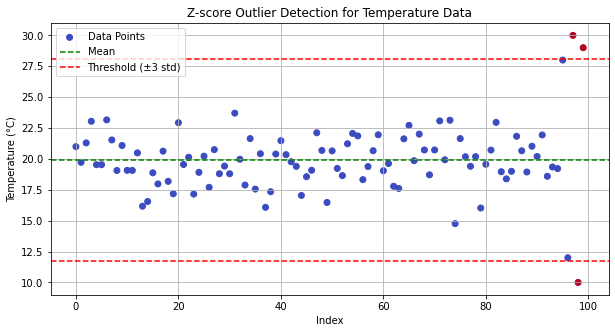

In [4]:
# Using Z-Score 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)
# Step 1: Generate synthetic univariate dataset (e.g., daily temperatures in Celsius)
n_samples = 100
normal_data = np.random.normal(loc=20, scale=2, size=n_samples - 5)  # Mean=20, std=2
outlier_data = np.array([28, 12, 30, 10, 29])  # Manually added outliers
data = np.concatenate([normal_data, outlier_data])
# Convert to pandas DataFrame for easier handling
df = pd.DataFrame(data, columns=['Temperature'])
# Step 2: Calculate Z-scores
# Z-score = (x - mean) / standard deviation
mean = df['Temperature'].mean()
std = df['Temperature'].std()
df['Z_score'] = (df['Temperature'] - mean) / std
# Step 3: Identify outliers (threshold: |Z-score| > 3)
threshold = 3
df['Is_Outlier'] = df['Z_score'].abs() > threshold
# Step 4: Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['Temperature'], c=df['Is_Outlier'],cmap='coolwarm', label='Data Points')
plt.axhline(y=mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=mean + threshold * std, color='red', linestyle='--',label=f'Threshold (±{threshold} std)')
plt.axhline(y=mean - threshold * std, color='red', linestyle='--')
plt.title('Z-score Outlier Detection for Temperature Data')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

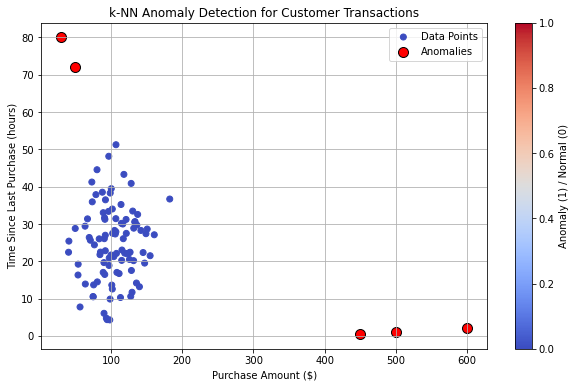

In [6]:
## K-NN for Anomaly Detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
# Set random seed for reproducibility
np.random.seed(42)
# Step 1: Generate synthetic multivariate dataset (e.g., customer transactions)
# Features: purchase amount, time since last purchase (hours)
n_samples = 100
normal_data = np.random.multivariate_normal(
    mean=[100, 24],  # Mean: $100, 24 hours
    cov=[[1000, 50], [50, 100]],  # Covariance for realistic spread
    size=n_samples - 5)
outlier_data = np.array([[500, 1], [50, 72], [600, 2], [30, 80], [450, 0.5]])  # Outliers
data = np.concatenate([normal_data, outlier_data])

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['Amount', 'Time_Since_Last'])

# Step 2: Preprocess data (standardize features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Amount', 'Time_Since_Last']])

# Step 3: Apply k-NN to compute distances to k-th nearest neighbor
k = 5  # Number of neighbors
knn = NearestNeighbors(n_neighbors=k)
knn.fit(data_scaled)
distances, _ = knn.kneighbors(data_scaled)
# Use distance to k-th neighbor as anomaly score
anomaly_scores = distances[:, k-1]

# Step 4: Identify outliers (threshold: top 5% of distances)
threshold = np.percentile(anomaly_scores, 95)  # Top 5% as anomalies
df['Anomaly_Score'] = anomaly_scores
df['Is_Anomaly'] = df['Anomaly_Score'] > threshold

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Time_Since_Last'], c=df['Is_Anomaly'],cmap='coolwarm', label='Data Points')
plt.title('k-NN Anomaly Detection for Customer Transactions')
plt.xlabel('Purchase Amount ($)')
plt.ylabel('Time Since Last Purchase (hours)')
plt.colorbar(label='Anomaly (1) / Normal (0)')
plt.grid(True)
# Highlight anomalies with larger markers
anomalies = df[df['Is_Anomaly']]
plt.scatter(anomalies['Amount'], anomalies['Time_Since_Last'], c='red', s=100,label='Anomalies', edgecolors='black')
plt.legend()

In [7]:
!pip install pyod

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl.metadata (2.2 kB)
Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Created wheel for pyod: filename=pyod-2.0.4-py3-none-any.whl size=200551 sha256=a1db50b9d3b6db2980241d6b1cdb1cb52a5376f0a5aecf8aa1969a97bd34db38
  Stored in directory: c:\users\nimrita koul\appdata\local\pip\cache\wheels\88\e6\83\32e2d796c08873bfe0467acfade014b6c4ffd842c71d4cd18a
Successfully built pyod
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.
gradio 4.0.2 requires websockets<12.0,>=10.0, but you have websockets 15.0.1 which is incompatible.
manim 0.18.1 requires numpy>=1.26, but you have numpy 1.21.6 which is incompatible.
pyldavis 3.4.0 requires numpy>=1.22.0, but you have numpy 1.21.6 which is incompatible.
streamlit 1.25.0 requires importlib-metadata<7,>=1.4, but you have importlib-metadata 8.5.0 which is incompatible.
streamlit 1.25.0 requires packaging<24,>=16.8, but you have packaging 24.2 which is incompatible.
streamlit 1.25.0 requires pillow<10,>=7.1.0, but you have pillow 10.4.0 which is incompatible.
tensorboard 2.10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyod.models.cof import COF

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic multivariate dataset (e.g., IoT sensor data)
# Features: temperature (°C), vibration (mm/s)
n_samples = 100
normal_data = np.random.multivariate_normal(
    mean=[25, 5],  # Mean: 25°C, 5 mm/s
    cov=[[10, 2], [2, 1]],  # Covariance for realistic spread
    size=n_samples - 5
)
outlier_data = np.array([[35, 10], [15, 0.5], [40, 12], [10, 0.3], [38, 15]])  # Outliers
data = np.concatenate([normal_data, outlier_data])

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['Temperature', 'Vibration'])

# Step 2: Preprocess data (standardize features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Temperature', 'Vibration']])

# Step 3: Apply Connectivity-Based Outlier Factor (COF)
k = 5  # Number of neighbors
cof = COF(n_neighbors=k, contamination=0.05)  # Expect 5% outliers
cof.fit(data_scaled)
labels = cof.labels_  # 1 for anomalies, 0 for normal
anomaly_scores = cof.decision_scores_  # Higher scores indicate anomalies

# Step 4: Identify anomalies
df['Anomaly_Score'] = anomaly_scores
df['Is_Anomaly'] = labels == 1  # COF labels anomalies as 1

# Step 5: Print results
print("Dataset with Anomaly Scores and Labels:")
print(df.head(10))
print("\nAnomalies Detected:")
print(df[df['Is_Anomaly']][['Temperature', 'Vibration', 'Anomaly_Score']])

# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Vibration'], c=df['Is_Anomaly'],
            cmap='coolwarm', label='Data Points')
plt.title('COF Anomaly Detection for IoT Sensor Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Vibration (mm/s)')
plt.colorbar(label='Anomaly (1) / Normal (0)')
plt.grid(True)

# Highlight anomalies with larger markers
anomalies = df[df['Is_Anomaly']]
plt.scatter(anomalies['Temperature'], anomalies['Vibration'], c='red', s=100,
            label='Anomalies', edgecolors='black')

plt.legend()
# Save the plot for inclusion in the book
#plt.savefig('cof_anomalies.png')
#plt.show()

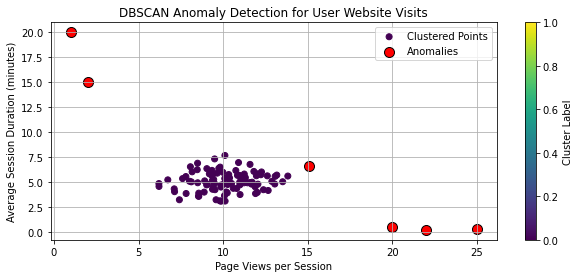

In [11]:
#DBSCAN for Anomaly Detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic multivariate dataset (e.g., user website visits)
# Features: page views per session, average session duration (minutes)
n_samples = 100
normal_data = np.random.multivariate_normal(
    mean=[10, 5],  # Mean: 10 page views, 5 minutes
    cov=[[4, 0.5], [0.5, 1]],  # Covariance for realistic spread
    size=n_samples - 5
)
outlier_data = np.array([[20, 0.5], [2, 15], [25, 0.3], [1, 20], [22, 0.2]])  # Outliers
data = np.concatenate([normal_data, outlier_data])

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['Page_Views', 'Session_Duration'])

# Step 2: Preprocess data (standardize features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Page_Views', 'Session_Duration']])

# Step 3: Apply DBSCAN for clustering and anomaly detection
eps = 0.5  # Radius of neighborhood
min_samples = 5  # Minimum points to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(data_scaled)  # Cluster labels: -1 for noise (anomalies), 0+ for clusters

# Step 4: Identify anomalies (noise points labeled as -1)
df['Cluster_Label'] = labels
df['Is_Anomaly'] = labels == -1  # Anomalies are noise points

# Step 6: Visualize the results
plt.figure(figsize=(10, 4))
# Plot normal points (clustered) with different colors for each cluster
normal_points = df[~df['Is_Anomaly']]
plt.scatter(normal_points['Page_Views'], normal_points['Session_Duration'],
            c=normal_points['Cluster_Label'], cmap='viridis', label='Clustered Points')
# Plot anomalies in red
anomalies = df[df['Is_Anomaly']]
plt.scatter(anomalies['Page_Views'], anomalies['Session_Duration'], c='red', s=100,
            label='Anomalies', edgecolors='black')
plt.title('DBSCAN Anomaly Detection for User Website Visits')
plt.xlabel('Page Views per Session')
plt.ylabel('Average Session Duration (minutes)')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()

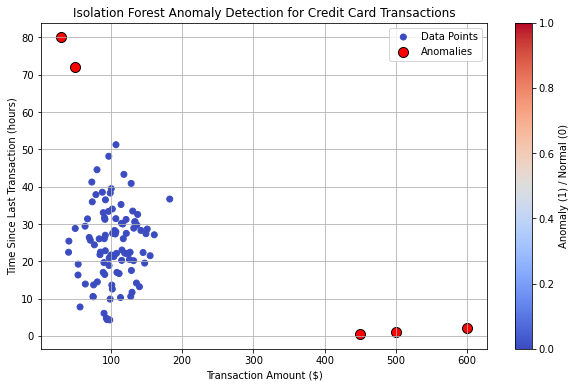

In [13]:
# Isolation Forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic multivariate dataset (e.g., credit card transactions)
# Features: transaction amount ($), time since last transaction (hours)
n_samples = 100
normal_data = np.random.multivariate_normal(
    mean=[100, 24],  # Mean: $100, 24 hours
    cov=[[1000, 50], [50, 100]],  # Covariance for realistic spread
    size=n_samples - 5)
outlier_data = np.array([[500, 1], [50, 72], [600, 2], [30, 80], [450, 0.5]])  # Outliers
data = np.concatenate([normal_data, outlier_data])

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['Amount', 'Time_Since_Last'])

# Step 2: Preprocess data (standardize features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Amount', 'Time_Since_Last']])

# Step 3: Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
labels = iso_forest.fit_predict(data_scaled)  # -1 for anomalies, 1 for normal
anomaly_scores = -iso_forest.decision_function(data_scaled)  # Higher scores for anomalies

# Step 4: Identify anomalies
df['Anomaly_Score'] = anomaly_scores
df['Is_Anomaly'] = labels == -1  # Anomalies are labeled as -1

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Time_Since_Last'], c=df['Is_Anomaly'],
            cmap='coolwarm', label='Data Points')
plt.title('Isolation Forest Anomaly Detection for Credit Card Transactions')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Time Since Last Transaction (hours)')
plt.colorbar(label='Anomaly (1) / Normal (0)')
plt.grid(True)

# Highlight anomalies with larger markers
anomalies = df[df['Is_Anomaly']]
plt.scatter(anomalies['Amount'], anomalies['Time_Since_Last'], c='red', s=100,
            label='Anomalies', edgecolors='black')
plt.legend()
plt.show()

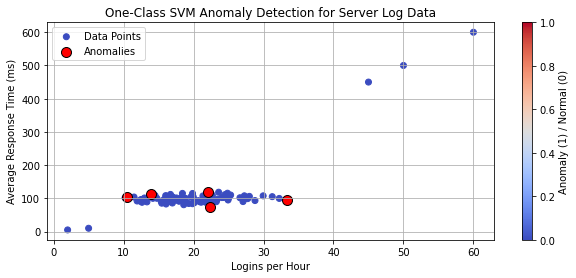

In [15]:
#One-Class SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic multivariate dataset (e.g., server log data)
# Features: number of logins per hour, average response time (ms)
n_samples = 100
normal_data = np.random.multivariate_normal(
    mean=[20, 100],  # Mean: 20 logins, 100 ms
    cov=[[25, 5], [5, 100]],  # Covariance for realistic spread
    size=n_samples - 5
)
outlier_data = np.array([[50, 500], [5, 10], [60, 600], [2, 5], [45, 450]])  # Outliers
data = np.concatenate([normal_data, outlier_data])

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['Logins', 'Response_Time'])

# Step 2: Preprocess data (standardize features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Logins', 'Response_Time']])

# Step 3: Apply One-Class SVM for anomaly detection
oc_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # nu=0.05 expects 5% outliers
labels = oc_svm.fit_predict(data_scaled)  # -1 for anomalies, 1 for normal
anomaly_scores = -oc_svm.decision_function(data_scaled)  # Higher scores for anomalies

# Step 4: Identify anomalies
df['Anomaly_Score'] = anomaly_scores
df['Is_Anomaly'] = labels == -1  # Anomalies are labeled as -1

# Step 5: Visualize the results
plt.figure(figsize=(10, 4))
plt.scatter(df['Logins'], df['Response_Time'], c=df['Is_Anomaly'],
            cmap='coolwarm', label='Data Points')
plt.title('One-Class SVM Anomaly Detection for Server Log Data')
plt.xlabel('Logins per Hour')
plt.ylabel('Average Response Time (ms)')
plt.colorbar(label='Anomaly (1) / Normal (0)')
plt.grid(True)

# Highlight anomalies with larger markers
anomalies = df[df['Is_Anomaly']]
plt.scatter(anomalies['Logins'], anomalies['Response_Time'], c='red', s=100,
            label='Anomalies', edgecolors='black')
plt.legend()
plt.show()

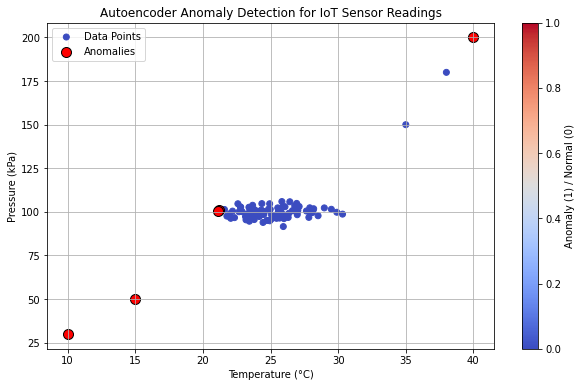

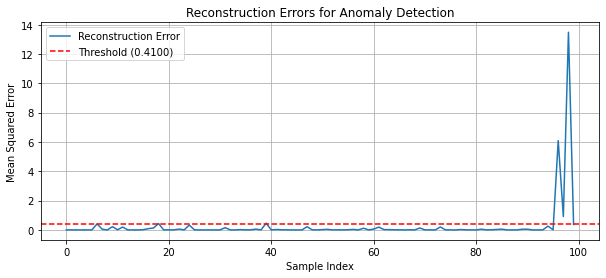

In [17]:
#Autoencoder for anomaly detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
np.random.seed(42)# Set random seed for reproducibility
n_samples = 100# Step 1: Generate synthetic multivariate time-series dataset (e.g., IoT sensor readings)
n_features = 2# Features: temperature (°C), pressure (kPa) over 100 time points
normal_data = np.random.multivariate_normal(
    mean=[25, 100],  # Mean: 25°C, 100 kPa
    cov=[[4, 0.5], [0.5, 10]],  # Covariance for realistic spread
    size=n_samples - 5)
outlier_data = np.array([[35, 150], [15, 50], [40, 200], [10, 30], [38, 180]])  # Outliers
data = np.concatenate([normal_data, outlier_data])
df = pd.DataFrame(data, columns=['Temperature', 'Pressure'])# Convert to pandas DataFrame
# Step 2: Preprocess data (standardize features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Temperature', 'Pressure']])
# Step 3: Define and train the autoencoder(Architecture:Input(2)->Hidden(8)->Bottleneck(4)->Hidden(8)->Output(2)
input_layer = Input(shape=(n_features,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(n_features, activation='linear')(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=16,shuffle=True, verbose=0)
# Step 4: Compute reconstruction errors
reconstructions = autoencoder.predict(data_scaled, verbose=0)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)  # Mean squared error
# Step 5: Identify anomalies (threshold: top 5% of reconstruction errors)
threshold = np.percentile(mse, 95)  # Top 5% as anomalies
df['Reconstruction_Error'] = mse
df['Is_Anomaly'] = mse > threshold
# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Pressure'], c=df['Is_Anomaly'],cmap='coolwarm', label='Data Points')
plt.title('Autoencoder Anomaly Detection for IoT Sensor Readings')
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (kPa)')
plt.colorbar(label='Anomaly (1) / Normal (0)')
plt.grid(True)
# Highlight anomalies with larger markers
anomalies = df[df['Is_Anomaly']]
plt.scatter(anomalies['Temperature'], anomalies['Pressure'], c='red', s=100,label='Anomalies', edgecolors='black')
plt.legend()
plt.show()
# Plot reconstruction errors
plt.figure(figsize=(10, 4))
plt.plot(df['Reconstruction_Error'], label='Reconstruction Error')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.4f})')
plt.title('Reconstruction Errors for Anomaly Detection')
plt.xlabel('Sample Index')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

Evaluation Metrics:
ROC-AUC: 0.936
Precision: 0.347
Recall: 0.347
F1-score: 0.347


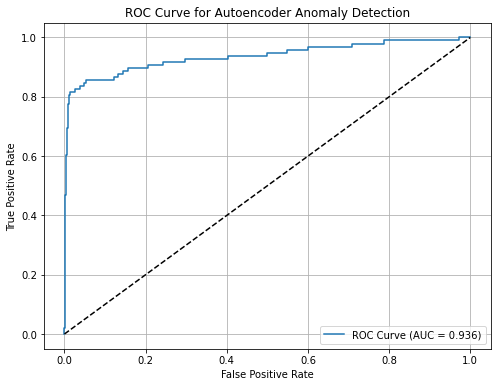

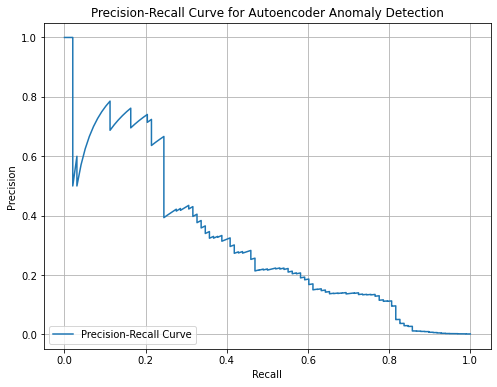

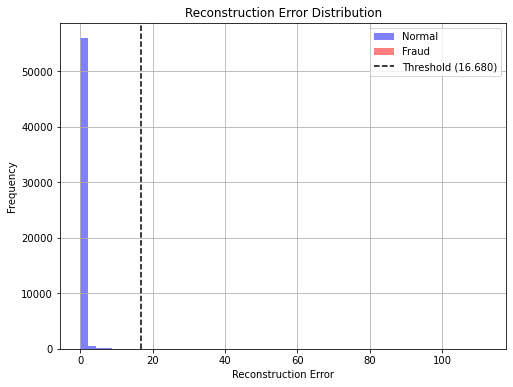

In [19]:
##Autoencoder Anomaly Detection with Evaluation Metrics on Kaggle Credit Card Fraud Dataset 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
np.random.seed(42)# Set random seed for reproducibility
# Step 1: Load the Kaggle Credit Card Fraud dataset
# Note: Download from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud  and place in working directory
df = pd.read_csv("creditcard.csv")
# Step 2: Preprocess the data, Drop 'Time' (less relevant for anomaly detection) and separate features and labels
X = df.drop(['Time', 'Class'], axis=1)  # Features: 28 PCA components + Amount
y = df['Class']  # Labels: 0 (normal), 1 (fraud)
scaler = StandardScaler()# Standardize features
X_scaled = scaler.fit_transform(X)
# Split into training (normal only) and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train_normal = X_train[y_train == 0]  # Train on normal transactions only
# Step 3: Define and train the autoencoder
n_features = X_train.shape[1]  # 29 features
input_layer = Input(shape=(n_features,))
encoded = Dense(14, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)
decoded = Dense(14, activation='relu')(encoded)
decoded = Dense(n_features, activation='linear')(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
# Train on normal transactions only
autoencoder.fit(X_train_normal, X_train_normal, epochs=50, batch_size=256,shuffle=True, validation_split=0.2, verbose=0)
# Step 4: Compute reconstruction errors
reconstructions = autoencoder.predict(X_test, verbose=0)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)  # Mean squared error
# Step 5: Evaluate with ROC-AUC and other metrics, Compute ROC curve and ROC-AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, mse)
roc_auc = auc(fpr, tpr)
# Set threshold (e.g., top 0.172% of errors, matching fraud proportion)
threshold = np.percentile(mse, 99.828)  # 100 - 0.172
predicted_labels = (mse > threshold).astype(int)
# Compute precision, recall, F1-score
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
# Compute precision-recall curve
precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test, mse)
# Step 6: Print results
print("Evaluation Metrics:")
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Step 7: Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Autoencoder Anomaly Detection')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 8: Visualize precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Autoencoder Anomaly Detection')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Optional: Plot reconstruction error distribution
plt.figure(figsize=(8, 6))
plt.hist(mse[y_test == 0], bins=50, alpha=0.5, label='Normal', color='blue')
plt.hist(mse[y_test == 1], bins=50, alpha=0.5, label='Fraud', color='red')
plt.axvline(threshold, color='black', linestyle='--', label=f'Threshold ({threshold:.3f})')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.grid(True)
plt.show()